# Machine Learning Assignment

In [113]:
#Answered questions at the top for ease 


a. Looking at the clustering for Figure 3 I was slighlty surprised by the grouping. I didn't expect the clustering to be done as precicsly as it was based on the elbow plots interpratations of 4 clusters being the optimal amount. 

b. I personally would like to know if any of the clusteres could infidcate insight to generic tratment plans for those within wach cluster. i could find this out by reading in cluster/patient data and then corresponding the two to determine and statistically relavant information.

c. I can really only think of one way which is the intersect method. This shoudl lead to a k-means, but you could also do it through kmap. Sketches are in "Part C sketch.jpg"



In [1]:
# Elbow plot to get number of clusters
# With that find th k-mean
# For RNA data only need count, and clinical data

In [77]:
import os
os.chdir('/Users/talhaaccount/Desktop/Qbio_490_R/qbio_490_talha/analysis_data/')

In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import cptac as cp
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# download the Brca dataset
cp.download(dataset="Brca")
brca = cp.Brca()

# extract the data
clinical_data = brca.get_clinical()
transcriptomic_data = brca.get_transcriptomics()
protein_data = brca.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

In [115]:
protein_data = protein_data.dropna(axis=1)

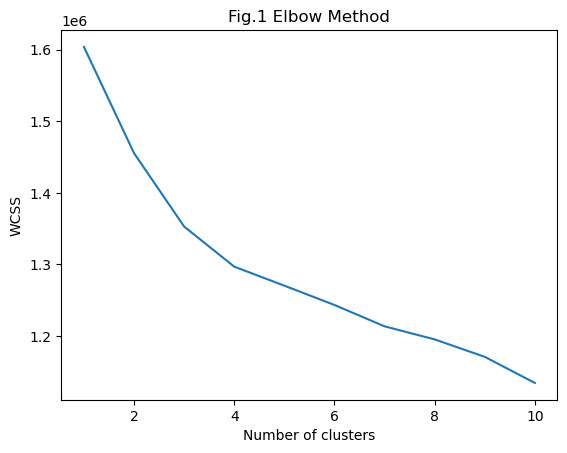

In [116]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(protein_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Fig.1 Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Fig.1 Presented above is an elbow plot displaying the optial number of clusters for our protien data. We see 
#       a platue beggining to occur in at the number of 4 clusters

In [46]:
RNA_data = pd.read_csv('/Users/talhaaccount/Desktop/Qbio_490_R/qbio_490_talha/analysis_data/brca_rna_count_data.csv',index_col=0)

In [49]:
#convert RNA data so rows are patients
#will match up with clinical where rows are patients
RNA_data = RNA_data.T

In [51]:
#Patients that are both in clinical_data and RNA_data
intersects_d = np.intersect1d(RNA_data.index, clinical_data.index)

In [53]:
#mask to only have shared patients in RNA_data
RNA_data = RNA_data.loc[intersects_d,:]

In [55]:
#mask to only have shared patients in clinical_data
clinical_data = clinical_data.loc[intersects_d,:]

In [37]:
clinical_data = pd.read_csv('/Users/talhaaccount/Desktop/Qbio_490_R/qbio_490_talha/analysis_data/brca_rna_clincial_data.csv',index_col=0)

In [44]:
clinical_data.loc[:,'paper_BRCA_Pathology'].value_counts( )

IDC      524
ILC      136
Other    118
Mixed     91
Name: paper_BRCA_Pathology, dtype: int64

In [92]:
# set your working director to analysis data
import os
os.chdir('/Users/talhaaccount/Desktop/Qbio_490_R/qbio_490_talha/analysis_data/')

# download the Brca dataset
cptac.download(dataset="BRCA")
brca = cptac.Brca()

# extract the data
clinical_data = brca.get_clinical()
transcriptomic_data = brca.get_transcriptomics()
protein_data = brca.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
#Redoing rna_clinical 
rna_clinical = pd.read_csv('/Users/talhaaccount/Desktop/Qbio_490_R/qbio_490_talha/analysis_data/brca_rna_clincial_data.csv',index_col=0)
clinical_dat = {'Barcode':rna_clinical.loc[:, "barcode"],'Stage':rna_clinical.loc[:, "paper_pathologic_stage"]}
target_df = pd.DataFrame(clinical_dat, columns=['Barcode','Stage'])
barcode_dict = pd.Series(target_df.Stage.values,index=target_df.Barcode).to_dict()

In [95]:
#read in counts data again
rna_counts = pd.read_csv("brca_rna_count_data.csv")
rna_counts = rna_counts.iloc[:, 2:len(rna_counts.columns)]

In [96]:
rna_counts = rna_counts.T
rna_counts['barcodes'] = rna_counts.index
rna_counts['stage'] = rna_counts['barcodes'].map(barcode_dict)
rna_counts = rna_counts.drop(['barcodes'],axis =1)

In [97]:
rna_counts = rna_counts.dropna(axis="rows")


In [98]:
x = rna_counts.loc[:, rna_counts.columns != 'stage'].values
x = StandardScaler().fit_transform(x)

In [99]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])


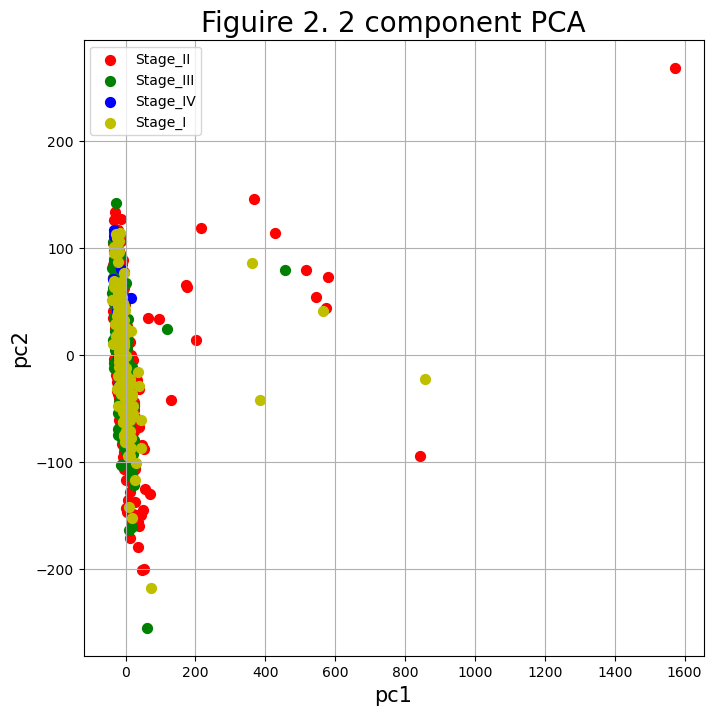

In [112]:
principalDf['stage'] = rna_counts['stage'].values
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('Figuire 2. 2 component PCA', fontsize = 20)
targets = pd.unique(principalDf.loc[:, "stage"])
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['stage'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'pc1']
               , principalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

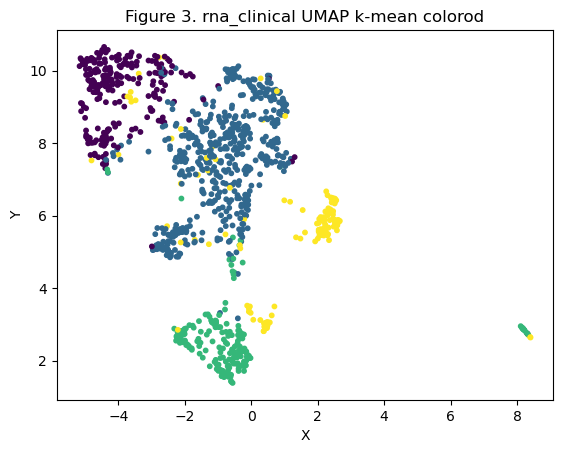

In [117]:
rna_clinical = pd.read_csv('/Users/talhaaccount/Desktop/Qbio_490_R/qbio_490_talha/analysis_data/brca_rna_clincial_data.csv',index_col=0)
import sklearn.cluster as cluster
import umap
import random
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
rna_clinical = onehotencoder.fit_transform(rna_clinical).toarray()

mapper = umap.UMAP().fit_transform(rna_clinical)

kmeans_labels = cluster.KMeans(n_clusters=4).fit_predict(rna_clinical)
plt.scatter(mapper[:, 0], mapper[:, 1], c=kmeans_labels, s=10);
plt.title("Figure 3. rna_clinical UMAP k-mean colorod")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

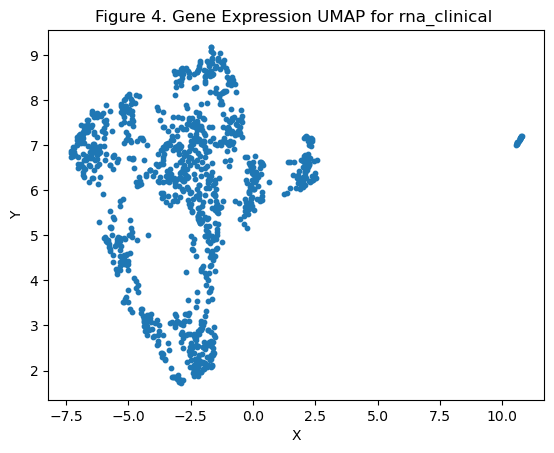

In [118]:
import sklearn.cluster as cluster
import umap
import random
rna_clinical = pd.read_csv('/Users/talhaaccount/Desktop/Qbio_490_R/qbio_490_talha/analysis_data/brca_rna_clincial_data.csv',index_col=0)

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
rna_clinical = onehotencoder.fit_transform(rna_clinical).toarray()

mapper = umap.UMAP().fit_transform(rna_clinical)

gene_labels = rna_clinical
plt.scatter(mapper[:, 0], mapper[:, 1], s=10, cmap="rainbow");
plt.title("Figure 4. Gene Expression UMAP for rna_clinical ")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


/Users/talhaaccount/opt/miniconda3/envs/qbio490_talha/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Figure 5. clustering heatmap for rna_clinical data.


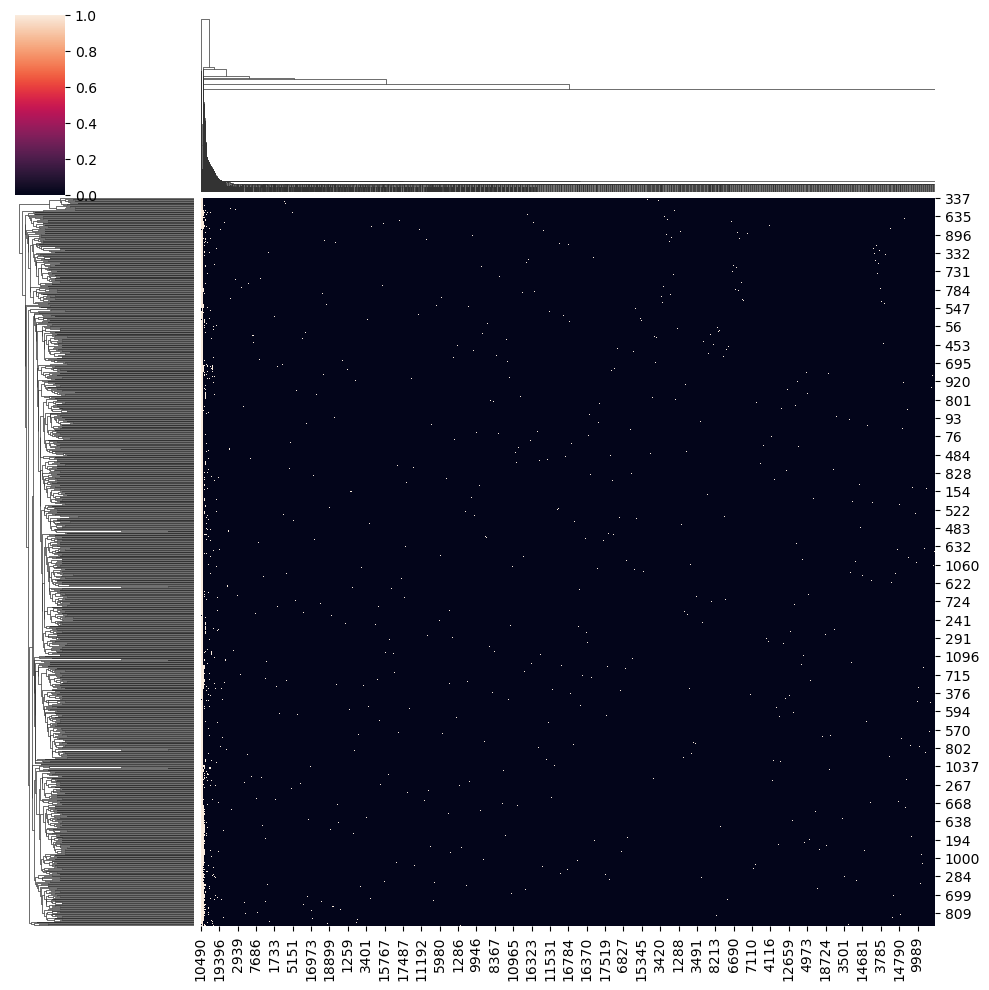

In [111]:
sns.clustermap(rna_clinical, pivot_kws=None, method='average', metric='euclidean', z_score=None, 
               standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, 
               colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None)
print("Figure 5. clustering heatmap for rna_clinical data.")